In [26]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [28]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

In [29]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

In [30]:
# Listing 2.1 Loading the MNIST dataset in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print("train_images : \n", train_images[0:1])

train_images : 
 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0 

In [32]:
#print(type(train_labels))
#print(train_labels)
print(len(train_labels))

60000


In [33]:
# Listing 2.2 The network architecture
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [34]:
# Listing 2.3 The compilation step
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


In [35]:
# Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [36]:
# Listing 2.5 Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 14s 26ms/step - loss: 0.4119 - accuracy: 0.8801
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1092 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0699 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0472 - accuracy: 0.9866
Epoch 5/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0382 - accuracy: 0.9899


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss= ", test_loss, ", test_acc= ", test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0784 - accuracy: 0.9762
test_loss=  0.07838935405015945 , test_acc=  0.9761999845504761


In [38]:
# Reload dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
# Listing 2.6 Displaying the fourth digit
digit = train_images[4]
print(digit)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

'\ndef show_image(image):\n  fig = plt.gcf()\n  fig = fig.set_size_inches(2, 2)\n  plt.imshow(image, cmap=plt.cm.binary)\n  plt.show()\n'

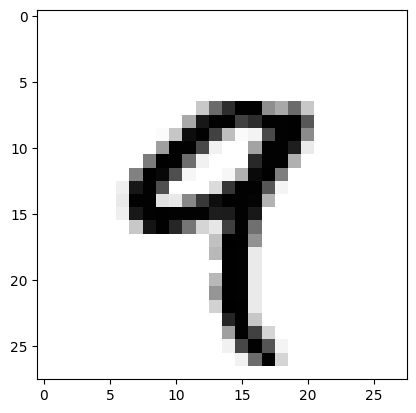

9


In [41]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print(train_labels[4])

In [42]:
m_slice = train_images[10:100]
print(m_slice.shape)

(90, 28, 28)


In [45]:
m_slice = train_images[10:100, :, :]
print(m_slice.shape)

(90, 28, 28)


In [66]:
import numpy as np
x = np.array([[2, 2],[1, 3], [3, 2]])
print(x, type(x), x.shape)
y = np.array([[1], [3], [5]])
print(y, type(y), y.shape)
z = x * y
print(z)

[[2 2]
 [1 3]
 [3 2]] <class 'numpy.ndarray'> (3, 2)
[[1]
 [3]
 [5]] <class 'numpy.ndarray'> (3, 1)
[[ 2  2]
 [ 3  9]
 [15 10]]


In [97]:
x = np.random.random((2,2,3,2))
print(type(x), x.shape)
print(x)

y = np.random.random((2,3,1))
print(type(y), y.shape)
print(y)

z = np.maximum(x,y)
print(type(z), z.shape)
print(z)


<class 'numpy.ndarray'> (2, 2, 3, 2)
[[[[0.51540562 0.13173311]
   [0.66891967 0.67045514]
   [0.28281743 0.64565078]]

  [[0.68840355 0.2593745 ]
   [0.24824444 0.82267299]
   [0.58103899 0.5649096 ]]]


 [[[0.54111844 0.28103169]
   [0.73829877 0.36340135]
   [0.75982233 0.84578714]]

  [[0.40937826 0.38184561]
   [0.86249965 0.8144164 ]
   [0.62454009 0.61813341]]]]
<class 'numpy.ndarray'> (2, 3, 1)
[[[0.89332407]
  [0.26930243]
  [0.79785193]]

 [[0.94941579]
  [0.4579105 ]
  [0.23360269]]]
<class 'numpy.ndarray'> (2, 2, 3, 2)
[[[[0.89332407 0.89332407]
   [0.66891967 0.67045514]
   [0.79785193 0.79785193]]

  [[0.94941579 0.94941579]
   [0.4579105  0.82267299]
   [0.58103899 0.5649096 ]]]


 [[[0.89332407 0.89332407]
   [0.73829877 0.36340135]
   [0.79785193 0.84578714]]

  [[0.94941579 0.94941579]
   [0.86249965 0.8144164 ]
   [0.62454009 0.61813341]]]]


In [98]:
# 點積範例
x = np.random.random((3,2))
print(type(x), x.shape)
print(x)

y = np.random.random((2,3))
print(type(y), y.shape)
print(y)

z = np.dot(x,y)
print(type(z), z.shape)
print(z)

<class 'numpy.ndarray'> (3, 2)
[[0.47704973 0.39890754]
 [0.41900305 0.94335391]
 [0.3889958  0.36646431]]
<class 'numpy.ndarray'> (2, 3)
[[0.42328281 0.95978766 0.40619972]
 [0.52756162 0.8482704  0.44546404]]
<class 'numpy.ndarray'> (3, 3)
[[0.41237525 0.7962479  0.37147643]
 [0.67503411 1.20237316 0.59042917]
 [0.35798774 0.68421419 0.32125665]]


In [106]:
# 兩個向量點積是標量
x = np.random.random((1,3))
y = np.random.random((3,1))
print("x=\n ", x, "\ny=\n ", y)

z = np.dot(x, y)
print("z= \n", z)

x=
  [[0.22794893 0.86892059 0.65248832]] 
y=
  [[0.91557715]
 [0.65296048]
 [0.76673258]]
z= 
 [[1.27635969]]


In [ ]:
def naive_vector_dot(x, y) :
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]) :
        z += x[i] * y[i]
    return z